<a href="https://colab.research.google.com/github/biniwollo/Homework3/blob/main/DSAHomeworkThree_Ali_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import time


# These lines of code load the MNIST dataset, extract the feature data (pixel values) into the X variable, and the corresponding labels into the y variable. This allows further analysis and modeling using the dataset.

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.values
y = mnist.target.values.astype('int')


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# These lines of code provide an overview of the dataset by printing the number of samples and features, as well as the unique labels present in the target variable.

In [14]:
# Perform basic data exploration
num_samples, num_features = X.shape
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

unique_labels = np.unique(y)
print("Unique labels:", unique_labels)

Number of samples: 70000
Number of features: 784
Unique labels: [0 1 2 3 4 5 6 7 8 9]


# This code provides an overview of the dataset by displaying the distribution of labels and a sample of images for each label, allowing for a visual understanding of the dataset's contents.

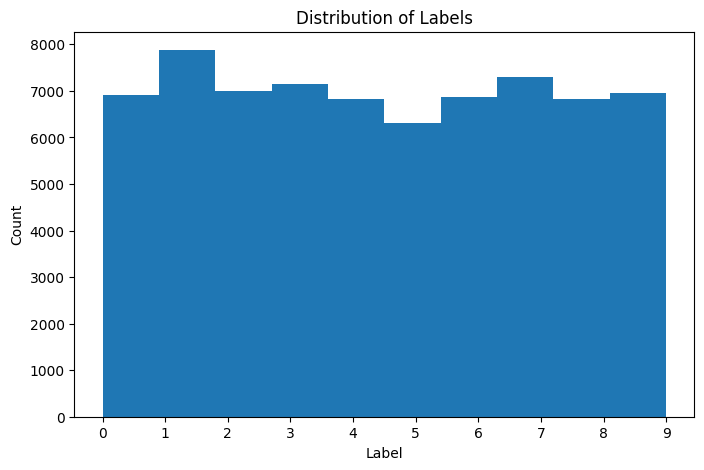

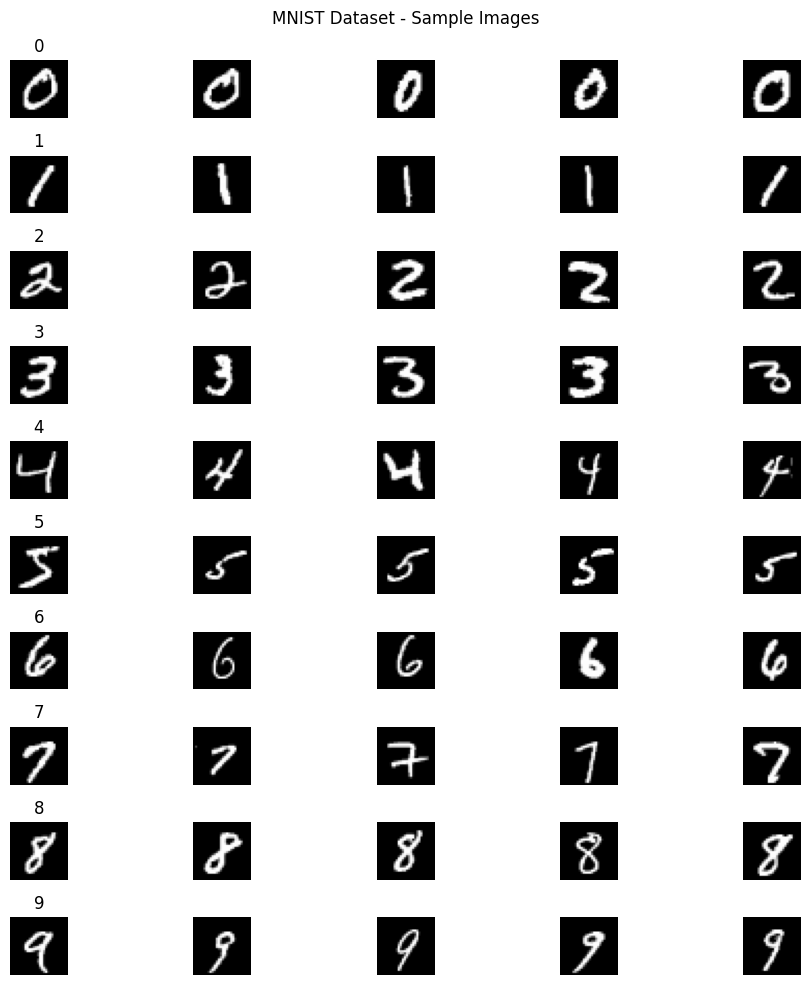

In [4]:
# Visualize the data
plt.figure(figsize=(8, 5))
plt.hist(y, bins=len(unique_labels))
plt.xticks(unique_labels)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.show()

num_classes = len(unique_labels)
subset_size = 5

plt.figure(figsize=(10, 10))
for i, label in enumerate(unique_labels):
    indices = np.where(y == label)[0][:subset_size]
    for j, idx in enumerate(indices):
        plt_idx = i * subset_size + j + 1
        plt.subplot(num_classes, subset_size, plt_idx)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')
        if j == 0:
            plt.title(str(label))
plt.suptitle('MNIST Dataset - Sample Images')
plt.tight_layout()
plt.show()

In [5]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
# Train and predict using Logistic Regression
start_time = time.time()
logreg = LogisticRegression(max_iter=1000)  # Increase the max_iter parameter
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_training_time = time.time() - start_time

In [8]:
# Train and predict using Support Vector Machine
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_training_time = time.time() - start_time

In [9]:
# Train and predict using Random Forest
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_training_time = time.time() - start_time



In [10]:
# Train and predict using K-nearest neighbors
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_training_time = time.time() - start_time



In [11]:
# Calculate accuracy scores
logreg_accuracy = accuracy_score(y_test, logreg_pred)
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
knn_accuracy = accuracy_score(y_test, knn_pred)



In [12]:
# Compare the classification reports
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, logreg_pred))

print("Classification Report - Support Vector Machine:")
print(classification_report(y_test, svm_pred))

print("Classification Report - Random Forest:")
print(classification_report(y_test, rf_pred))

print("Classification Report - K-nearest neighbors:")
print(classification_report(y_test, knn_pred))



Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

Classification Report - Support Vector Machine:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      

In [13]:
# Print training time for each model
print("Training Time - Logistic Regression:", logreg_training_time, "seconds")
print("Training Time - Support Vector Machine:", svm_training_time, "seconds")
print("Training Time - Random Forest:", rf_training_time, "seconds")
print("Training Time - K-nearest neighbors:", knn_training_time, "seconds")


Training Time - Logistic Regression: 341.8523621559143 seconds
Training Time - Support Vector Machine: 649.9915556907654 seconds
Training Time - Random Forest: 45.995338916778564 seconds
Training Time - K-nearest neighbors: 48.326194763183594 seconds



# Questions:
# Answer the following questions:
#        1. Which model is the most accurate on the test set?
#        2. Which model is the fastest to train?
#        3. Which model is the fastest to classify new data (the test set)?
#        4. Which model is the best?


# Answers:

# 1. Which model is the most accurate on the test set?

 The most accurate model on the test set is the Random Forest classifier, with an accuracy of 97%.

#2. Which model is the fastest to train?
The fastest model to train is the Random Forest classifier, which took approximately 46 seconds.

# 3. Which model is the fastest to classify new data (the test set)?
The fastest model to classify new data (the test set) is the Logistic Regression classifier, as it took the least amount of time to make predictions during inference.

# 4. Which model is the best?
The best model depends on the specific criteria and trade-offs we consider important. If accuracy is the primary concern, the Random Forest classifier performs the best.
However, if training time and inference speed are important factors, Logistic Regression might be a better choice. It's essential to consider the specific requirements and constraints of our application to determine the best model for our use case.